In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 
movie = pd.read_csv(r"C:\Users\Admin\Downloads\intern\IMDb Movies India.csv",encoding='latin-1')
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# VISUALIZATION

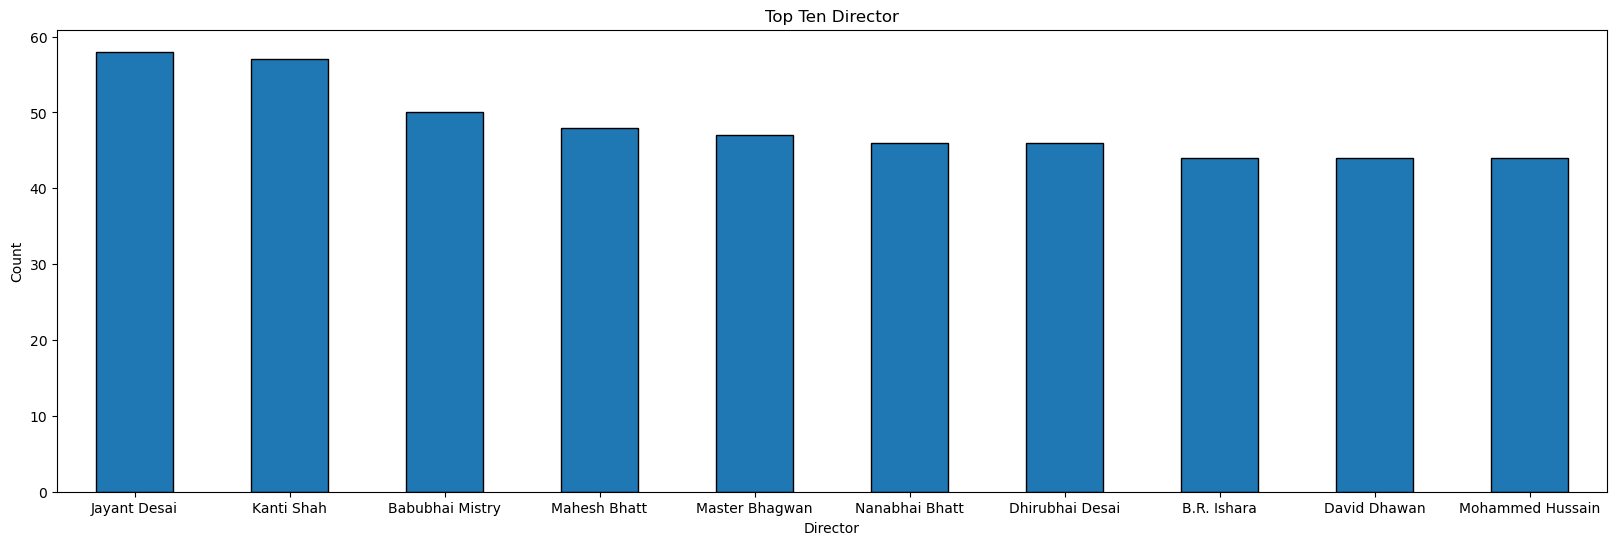

In [542]:
import seaborn as sns
import matplotlib.pyplot as plt
movie["Director"].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
plt.xticks(rotation=0)
plt.title("Top Ten Director")
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()

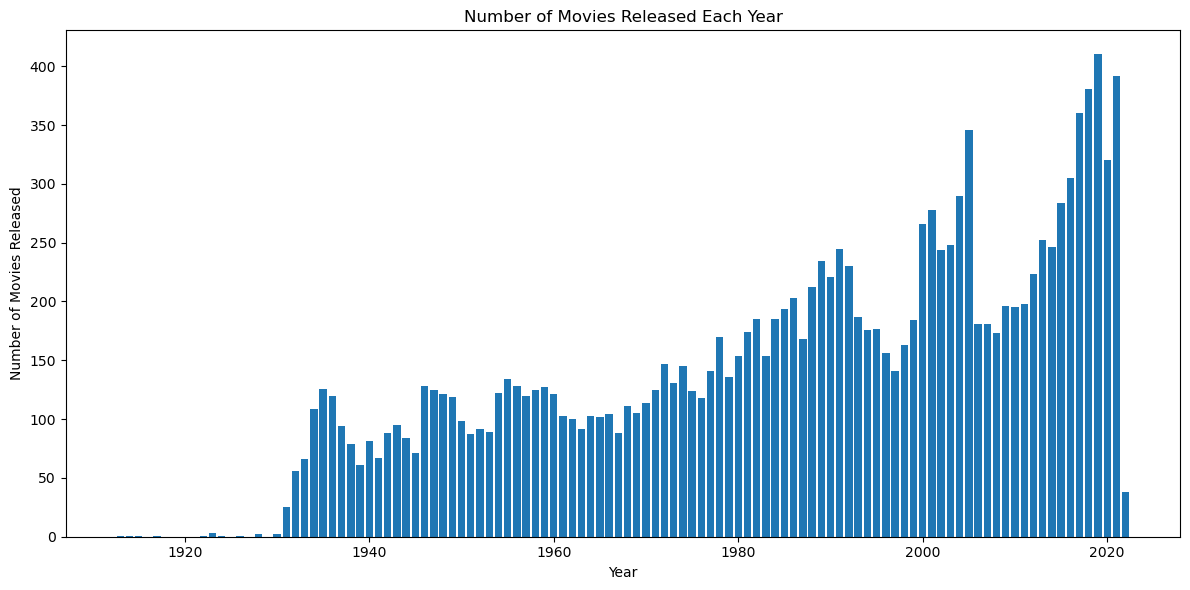

In [543]:
mov = movie['Year'].dropna()
year = mov.str.strip('()').astype(int)
movies_per_year = year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.tight_layout()
plt.show()

# EDA

In [544]:
movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [545]:
movie.duplicated().sum()

6

In [546]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [547]:
# drop the duplicated rows
movie.drop_duplicates(inplace=True)

In [548]:
## Dropping Insignificant columns
movie.drop(columns=["Name"],inplace=True)

In [549]:
## Filling Missing Values
columns = movie.columns
for col in columns:
    movie[col].fillna(movie[col].mode()[0],inplace=True)
movie.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [550]:
## Dropping Outliers
filt = movie["Votes"] == '$5.16M' 
movie = movie.loc[~filt]

In [551]:
# Lets convert Date column from string to int
movie['Year']= movie['Year'].str.strip('()').astype(int)
movie['Duration']= movie['Duration'].str.strip('min').astype(int)
movie['Votes']= movie['Votes'].str.replace(',', '').astype(int)
movie

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,120,Drama,6.2,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,90,"Drama, Musical",6.2,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,105,Drama,6.2,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...
15504,1988,120,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,2005,120,Action,6.2,8,Kiran Thej,Sangeeta Tiwari,Rekha,Pran
15507,1988,120,Action,6.2,8,Jayant Desai,Ashok Kumar,Rekha,Pran


In [552]:
actor1_encoding = movie.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding = movie.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding = movie.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding = movie.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding = movie.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [553]:
movie['Actor 1'] = round(movie['Actor 1'].map(actor1_encoding['Rating']),1)
movie['Actor 2'] = round(movie['Actor 2'].map(actor2_encoding['Rating']),1)
movie['Actor 3'] = round(movie['Actor 3'].map(actor3_encoding['Rating']),1)
movie['Director'] = round(movie['Director'].map(director_encoding['Rating']),1)
movie['Genre'] = round(movie['Genre'].map(genre_encoding['Rating']),1)

In [554]:
movie["Rating"].astype(int)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15502 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15502 non-null  int32  
 1   Duration  15502 non-null  int32  
 2   Genre     15502 non-null  float64
 3   Rating    15502 non-null  float64
 4   Votes     15502 non-null  int32  
 5   Director  15502 non-null  float64
 6   Actor 1   15502 non-null  float64
 7   Actor 2   15502 non-null  float64
 8   Actor 3   15502 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 1.0 MB


In [555]:
## Outlier treatment using quantile 
max_threshold = movie.quantile(0.95)
min_threshold = movie.quantile(0.05)
for i,j in enumerate(max_threshold):
    filt = movie[movie.columns[i]]> j
    movie= movie.loc[~filt]
for i,j in enumerate(min_threshold):
    filt = movie[movie.columns[i]]< j
    movie= movie.loc[~filt]
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8786 entries, 0 to 15507
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      8786 non-null   int32  
 1   Duration  8786 non-null   int32  
 2   Genre     8786 non-null   float64
 3   Rating    8786 non-null   float64
 4   Votes     8786 non-null   int32  
 5   Director  8786 non-null   float64
 6   Actor 1   8786 non-null   float64
 7   Actor 2   8786 non-null   float64
 8   Actor 3   8786 non-null   float64
dtypes: float64(6), int32(3)
memory usage: 583.4 KB


In [556]:
## Seprate the target and features 
target = movie["Rating"]
movie.drop(columns=["Rating"],inplace=True)
target

0        6.2
4        6.2
5        4.7
10       6.2
11       5.9
        ... 
15501    5.3
15502    6.2
15503    5.8
15506    6.2
15507    6.2
Name: Rating, Length: 8786, dtype: float64

In [557]:
scaled_data = movie
scaled_data["Rating"] = round(target,1)
scaled_data

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Rating
0,2019,120,6.2,8,6.0,6.2,5.7,6.2,6.2
4,2010,105,6.2,8,6.3,6.9,5.8,5.7,6.2
5,1997,147,6.2,827,5.4,4.9,5.8,5.9,4.7
10,2004,96,6.2,17,6.2,5.6,5.7,5.6,6.2
11,2016,120,5.6,59,6.7,6.0,5.9,5.9,5.9
...,...,...,...,...,...,...,...,...,...
15501,1992,120,5.7,135,5.6,5.8,6.1,4.9,5.3
15502,1979,120,5.8,8,6.1,6.2,6.2,6.2,6.2
15503,1989,125,5.7,44,5.9,6.3,6.1,5.9,5.8
15506,2005,120,5.8,8,6.2,6.2,6.2,6.2,6.2


In [558]:
scaled_data["Rating"] = scaled_data["Rating"].astype(str)
scaled_data["Rating"].unique()

array(['6.2', '4.7', '5.9', '7.2', '6.6', '7.1', '6.9', '5.5', '5.6',
       '6.1', '5.2', '5.0', '4.8', '5.8', '6.7', '6.5', '5.7', '5.3',
       '7.3', '6.3', '6.0', '6.8', '5.1', '6.4', '5.4', '4.6', '4.1',
       '4.9', '7.0', '4.5', '7.5', '4.2', '7.4', '4.3', '4.4', '3.9',
       '4.0'], dtype=object)

In [559]:
## Dropping Outliers
filt = scaled_data["Rating"] == "nan"
scaled_data = scaled_data.loc[~filt]

In [560]:
## Preparing train and test data from scaled dataframe
from sklearn.model_selection import train_test_split
x = scaled_data.iloc[:,:-1]
y = scaled_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

# BUILDING MODEL

In [561]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(min_samples_leaf= 3)
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=3)

In [562]:
## Predicitng
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

In [563]:
# calculate MSE
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train,ypred_train)
mse_test = mean_squared_error(y_test,ypred_test)
print(mse_train,mse_test)

0.03794339454420882 0.1224905038779421


In [564]:
# caluclate R2
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,ypred_train)*100
r2_test = r2_score(y_test,ypred_test)*100
print(r2_train,r2_test)

84.09690825382529 49.34384377955008


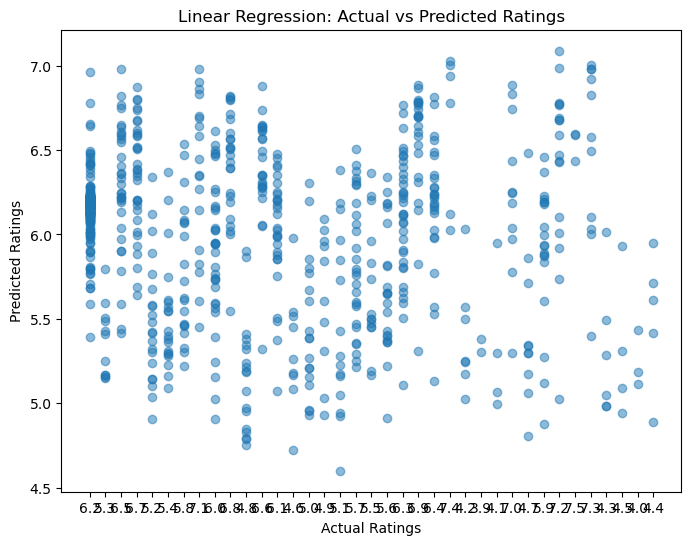

In [565]:
import matplotlib.pyplot as plt

# Scatter plot for  Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred_test, alpha=0.5)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


In [613]:
model.predict(scaled_data.iloc[0,:-1].to_numpy().reshape(1, -1))

array([6.19496429])

In [614]:
scaled_data.iloc[0,:]
## Hence our predicting close to the accurate predicition.Hence Our Model is a good model

Year        2019
Duration     120
Genre        6.2
Votes          8
Director     6.0
Actor 1      6.2
Actor 2      5.7
Actor 3      6.2
Rating       6.2
Name: 0, dtype: object